In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
digits=load_digits()

In [2]:
print("image datashape",digits.data.shape)
print("label datashape",digits.target.shape)

image datashape (1797, 64)
label datashape (1797,)


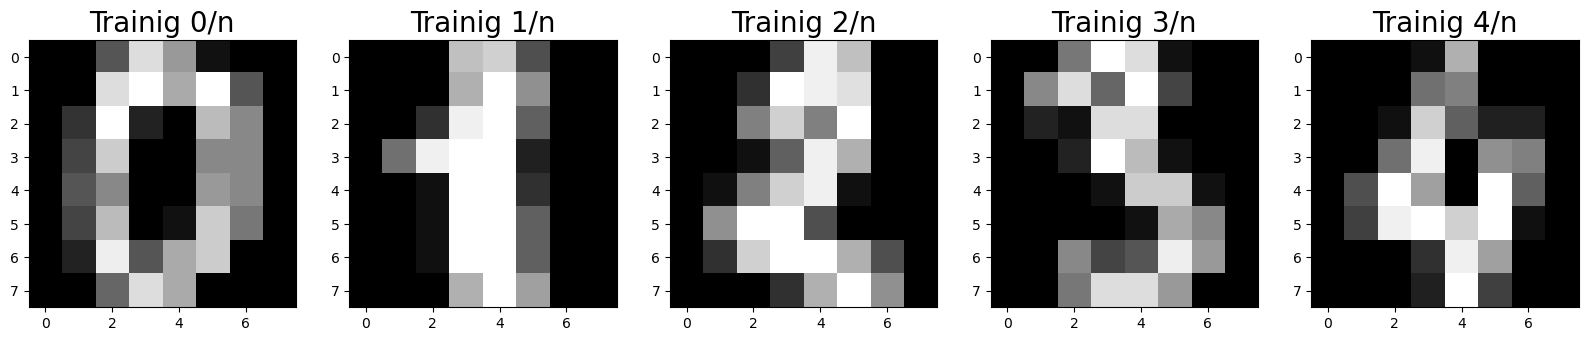

In [3]:
plt.figure(figsize=(20,4))
for index,(image,label)in enumerate (zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap="gray")
    plt.title("Trainig %i/n" % label,fontsize=20)


In [4]:
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [5]:
print(x_train.shape)


(1383, 64)


In [6]:
print(x_test.shape)


(414, 64)


In [7]:
print(y_train.shape)


(1383,)


In [8]:
print(y_test.shape)

(414,)


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
print(lgr.predict(x_test[0].reshape(1,-1)))

[4]


In [12]:
lgr.predict(x_test[0:11])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6])

In [13]:
pre=lgr.predict(x_test)

In [14]:
score=lgr.score(x_test,y_test)
print(score)

0.9516908212560387


In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics

In [16]:
cm = metrics.confusion_matrix(y_test,pre)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


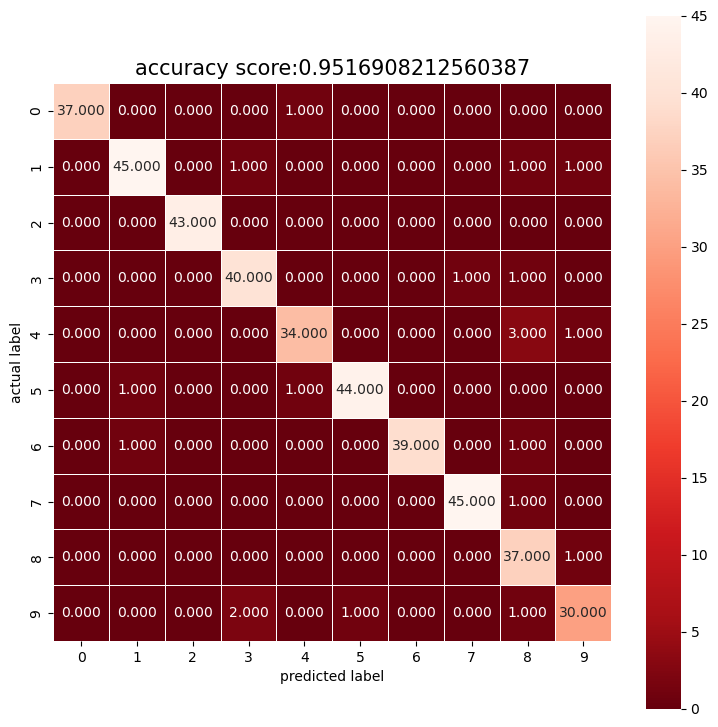

In [17]:
plt.figure(figsize=(9,9))
sn.heatmap(cm,annot=True,fmt=".3f",linewidths=.5,square=True,cmap="Reds_r");
plt.ylabel("actual label");
plt.xlabel("predicted label");
all_sample_title = "accuracy score:{0}" .format(score)
plt.title(all_sample_title,size=15);

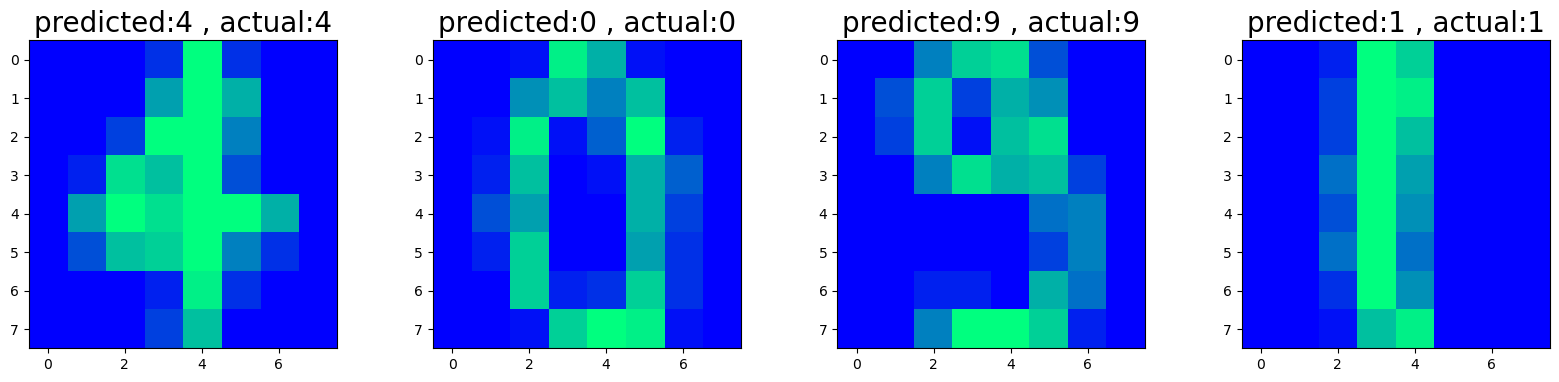

In [18]:
index = 0
misclassifiedindex = []
for predicted, actual in zip(pre, y_test):
    if predicted == actual:
        misclassifiedindex.append(index)
    index += 1

plt.figure(figsize=(20, 4))
for plotindex, wrong in enumerate(misclassifiedindex[0:4]):
    plt.subplot(1, 4, plotindex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap="winter")
    plt.title("predicted:{} , actual:{}".format(pre[wrong], y_test[wrong]), fontsize=20)


In [19]:
#using kmc

In [20]:
from sklearn.datasets import load_digits
digit=load_digits()
print(digit.data.shape)
print(digit.data.size)


(1797, 64)
115008


In [22]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=10,random_state=2)
clusters=kmeans.fit_predict(digit.data) 
kmeans.cluster_centers_.shape

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(10, 64)

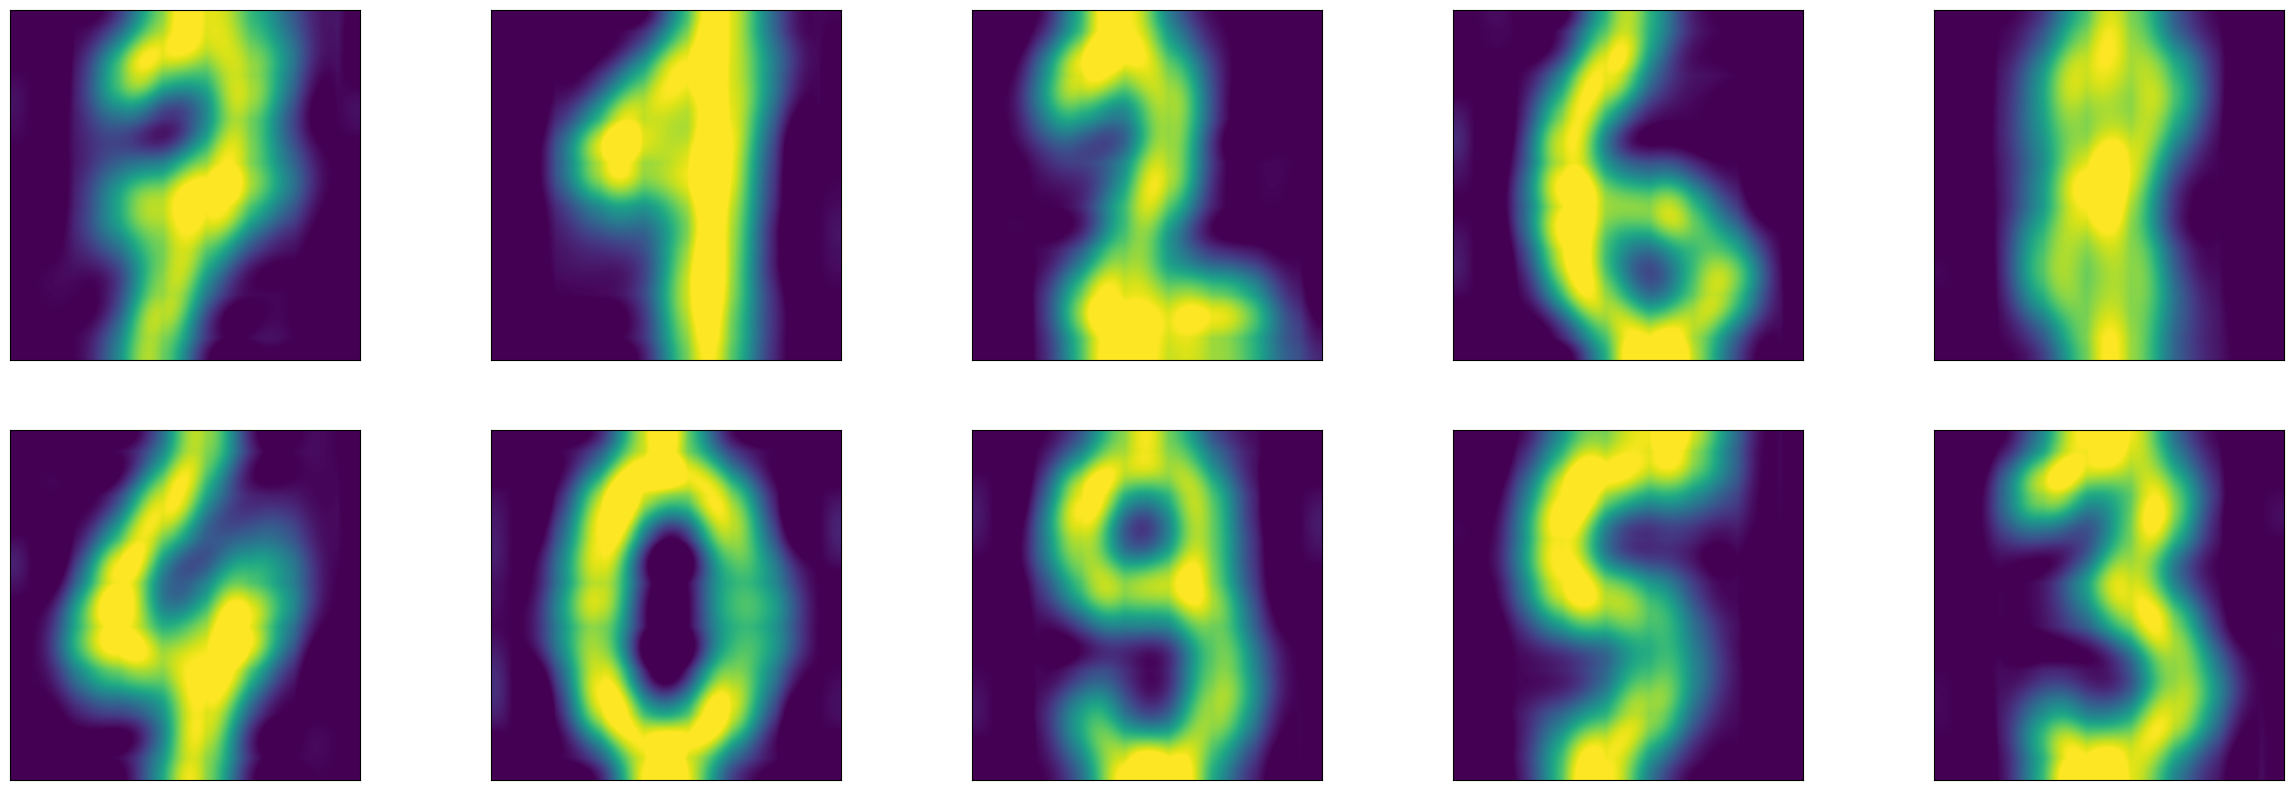

In [23]:
#plotting digits
fig,ax=plt.subplots(2,5,figsize=(30,10))
centers=kmeans.cluster_centers_.reshape(10,8,8)
for axi,center in zip(ax.flat,centers):
    axi.set(xticks=[],yticks=[])
    axi.imshow(center,interpolation='sinc',cmap='viridis')

In [24]:
from scipy.stats import mode
labels=np.zeros_like(clusters)
for i in range(10):
    mask=(i==clusters)
    labels[mask]=mode(digit.target[mask])[0]

C:\Users\vicky\AppData\Local\Temp\ipykernel_12208\20635898.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask]=mode(digit.target[mask])[0]


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(digit.target,labels)

0.7907623817473567

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
mtrx=confusion_matrix(digit.target,labels)
print(mtrx)


[[177   0   0   0   1   0   0   0   0   0]
 [  0 154  24   1   0   1   2   0   0   0]
 [  1  10 148  13   0   0   0   3   0   2]
 [  0   7   0 154   0   2   0   7   0  13]
 [  0   7   0   0 166   0   0   8   0   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0   4   0   0   0   5   0 170   0   0]
 [  0 105   3   2   0   8   2   2   0  52]
 [  0  21   0   6   0   7   0   7   0 139]]


In [27]:
creport = classification_report(digit.target,labels)
print(creport)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.50      0.85      0.62       182
           2       0.85      0.84      0.84       177
           3       0.87      0.84      0.86       183
           4       0.98      0.92      0.95       181
           5       0.86      0.75      0.80       182
           6       0.97      0.98      0.98       181
           7       0.86      0.95      0.90       179
           8       0.00      0.00      0.00       174
           9       0.56      0.77      0.65       180

    accuracy                           0.79      1797
   macro avg       0.74      0.79      0.76      1797
weighted avg       0.75      0.79      0.76      1797



C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(77.92222222222227, 0.5, 'predicted value')

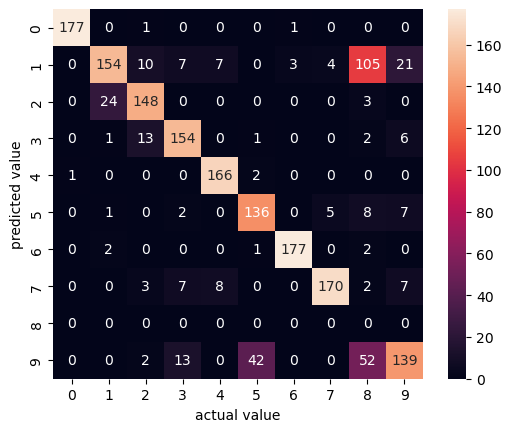

In [29]:
sn.heatmap(mtrx.T,square=True,cbar=True,annot=True,fmt='d',
            xticklabels=digit.target_names,yticklabels=digit.target_names)
plt.xlabel('actual value')
plt.ylabel('predicted value')